<a href="https://colab.research.google.com/github/PyDataCalgary/pydata-calgary/blob/master/Probability_Prerequisites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyData Calgary Bayesian Series: Probability Prerequisites

Every data science professional, enthusiast, student, or manager must have a friendly relationship with core concepts from probability.
Throughout the Calgary PyData series on Bayesian statistics, we will assume the user has familiarity and comfort with these concepts and
terminology.

This notebook is intended to act as a reference for newcomers and those who are looking to refresh their memories. It can be read as a standalone
refresher, but we will also host a live session to work through and discuss all the concepts provided.

In this notebook, we will review the following concepts:

 - Stochastic (random) vs deterministic variables
 - Independent, identitically distributed random variables
 - Marginal, joint, and conditional probability
 - Conditional Independence
 - Generative vs Discriminative modelling
 - Frequentist vs Bayesian views
 - Bayes Theorem
 
 
If you feel like you could use a refresher for any of the above, then this notebook is for you. Otherwise, feel free to skip this one, or to simply 
skip ahead to the sections which interest you. 

## Stochastic (Random) Variables

As always, let's start with our trusty companion Wikipedia to provide us a definition: 'In probability and statistics, a random ... or stochastic variable is described informally as a variable whose values depend on outcomes of a random phenomenon.' In layman's terms, it means that even given all of the information which describes the variable, it is still impossible to know *exactly* what the variable's value will be one you measure it - there is some element of uncertainty. Contrast the result of calculating the result of 12 * 12 with a calculator, vs asking a someone on the street the answer. Calculating it outright is deterministic - you will get the same answer every time. Asking a stranger is a random variable - you can't guarantee what answer you will get, and you might even get a different answer asking the same person twice!

The classic and simplest example is a rolling a dice. You know you will get a number between 1 and 6, with a probability of 1/6 for each face. For this demo, let's instead go to the subatomic world and discuss light passing through a polarized filter. You see, the quantum world tells us that whether or not light will pass through a polarized filter is a function of the angle between the polarization direction of the light and the filter [1]. X% of the photons will fail to make it through the filter.

[1] The effect, for those curious, is described [in this fantastic video](https://www.youtube.com/watch?v=zcqZHYo7ONs) where I took the screenshot.

![image.png](https://drive.google.com/uc?id=1z0EAG8cURd-FylXmNO45dWNHROnbQSSF)


Now, the mind boggling effect which I think so perfectly captures the idea behind a random variable is that whether or not a photon of light will pass through is a **probability** given by the difference of polarization angles. For instance, if that angle is 45 degrees as in the exampel above, then there is a 50% chance any given photon will make it through. Regardless of the fact that you have all of the imputs to the system, if your colleaguew were to ask "will photon x with an polarization difference of 60 degrees make it through the filter?" the best answer you can give is "probably not, but there is a 25% chance it will."

That "probably not" is the essence of a random variable. I find the phrase random variable to be a bit of a misnomer, hence why I prefer the term stochastic variable. You see, these variable aren't truly random - we are often able to make reasonable guesses about what the likely values a stochastic variable will be. We have a really good idea that if 100 photons pass pass through the filter, about 25 will make it through. But, (probably) not exactly 25! In fact, we can calculate how likely we are to observe any given count of photons with the Binomial distribution (don't worry - we'll explain this shortly):

Populating the interactive namespace from numpy and matplotlib


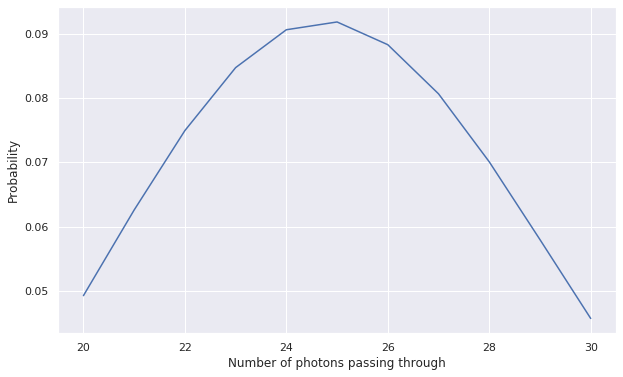

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown
import seaborn as sns
sns.set()
%pylab inline
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots(1, 1)
n, p = 100, .25
x = np.arange(20, 31)
rv = stats.binom(n, p)
ax.plot(x, stats.binom.pmf(x, n, p))
plt.xlabel('Number of photons passing through')
plt.ylabel('Probability');

The figure above shows the probability that a given number of photons will pass through the polarized filter with a polarization angle difference of 60 degrees. In fact, there is only a 9% chance that *exactly* 25 photons out of 100 will pass through. We can model the number of photons succesfully passing through the filter as a stochastic variable. Lets call it x and calculate it's value. The value of x will be different on every run of the notebook.

In [ ]:
x = stats.binom.rvs(100, .25)
print(f'The value of the random variable x is: {x}')

The value of the random variable x is: 26


In [ ]:
display(Markdown('We can create arrays of random variables:'))
xs = stats.binom.rvs(100, .25, size=30)
print(xs)
display(Markdown('Typically, in most of the future work we deal with in this series, we will use arrays '
                 'and matrices of random variables'))


We can create arrays of random variables:

[28 27 20 24 29 29 27 21 19 25 31 28 33 25 25 29 27 27 25 33 27 26 22 33
 22 24 27 36 29 22]


Typically, in most of the future work we deal with in this series, we will use arrays and matrices of random variables

## Sampling and Distributions

Now that we've defined a random variable, we create a random variable by sampling from a distribution. Later in this series we will take a tour of the various probability distributions. I assume everyone is familiar with at least the normal distribution. The important thing to remember is that if we parameterize the distribution, we have effectively defined all there is to know about the random variables which will be drawn for said distrubtion. 

In the example above, we defined a the number of photons passing through the filter as a binomial distribution, where the parameters were the number of photons to consider (n), and the probability that an individual photon will pass through the filter (p). 

Symbolically, we defined our random variable X (number of photons) as being sampled from a binomial distribution

$$X \sim \text{Bin}(n, p)$$

Where n is the number of photons passing through the filter, and p is the probability of any given photon passing through.

We also know that p is calculated deterministically from the angle $\theta$. Since p is determinitic, we can express it in our mathematical explanation of the world:

$$ p = f(\theta)$$

$$ X \sim \text{Bin}(n, p)$$

by taking $\theta = 45, n = 100$ and substituting, we have,

$$X \sim \text{Bin}(100, 0.25)$$

which descibses our system. The Bin refers to our binomial distribution, which we can fully descibe mathematically. The probability that we will see exactly k photons pass through is

$$P_{k photons} = {{n}\choose{k}}p^k(1-p)^{n-k}$$

This is known as the probability mass function[2] for the binomial distribution. The distribution chart a few cells above plotted this PMF as a function of k. In fact, we can calulate the probability that we observed the exact x from before!

[2] A side note - throughout this series we will not differentiate between probability mass and probability density functions. PMFs are for discrete rvs (random variables) and PMFs are for continuous rvs. There isn't really a meaningful difference for practitioners.

In [ ]:
from scipy.special import comb
p_xphotons = comb(100, x) * (0.25 ** x) * ((1 - 0.25) ** (100 - x) )
print(f'The probability of seeing {x} photons is {round(p_xphotons * 100, 1)}%')

The probability of seeing 26 photons is 8.8%


### PMF/PDF and CDF

We will extensively reference the pmf and cdf of distributions in the future sessions. As mentioned above, the probability mass function is the probability that our random variable takes on the specified value. For continuous variables, we technically use a probability density function instead, since we always have to use an interval of possible values. Remember that there are infinitely many numbers between 1.001 and 1.0011, so technically the probability that we see any *specific* value of a continuous variable is 0 (though, in this case 0 probability doesn't mean impossible). Don't worry if that seems confusing - it'll be intuitive once you start working through the data.


The **CDF** or cumulative distribution function is the probability that we will observe a value of our RV less than or equal to the specified value. That is, what is the probability that we see *at least* X photons: 

#### Here we see the PMF and CDF plotted on top of each other. The CDF is just the cumulative sum of the PMF (cumulative, anyone?). 

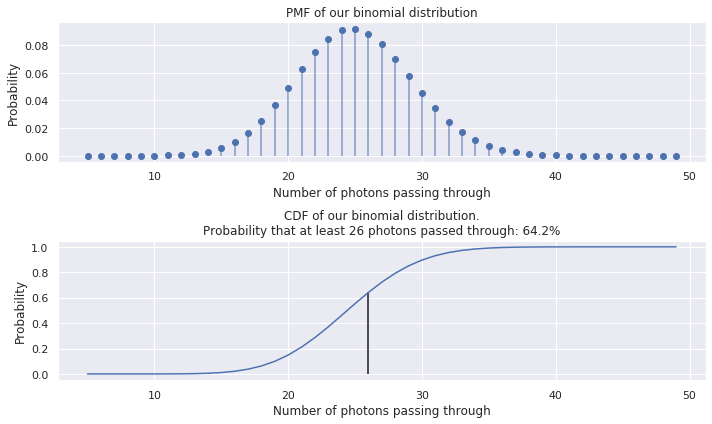

In [ ]:
fig, (ax1, ax2)  = plt.subplots(2, 1)
n, p = 100, .25
samples = np.arange(5, 50)
rv = stats.binom(n, p)
ax1.set_title('PMF of our binomial distribution')
ax1.plot(samples, stats.binom.pmf(samples, n, p), 'o')
ax1.set_xlabel('Number of photons passing through')
ax1.set_ylabel('Probability')
ax1.vlines(samples, 0, stats.binom.pmf(samples, n, p), colors='b', lw=2, alpha=0.5)

ax2.plot(samples, stats.binom.cdf(samples, n, p))
ax2.set_xlabel('Number of photons passing through')
ax2.set_ylabel('Probability')
cdfp = stats.binom.cdf(x, n, p)
ax2.vlines(x, 0, cdfp)
ax2.set_title('CDF of our binomial distribution.'
              f'\nProbability that at least {x} photons passed through: {round(cdfp * 100,1)}%')
plt.tight_layout()

display(Markdown(r'#### Here we see the PMF and CDF plotted on top of each other. The CDF is just the cumulative sum '
                 'of the PMF (cumulative, anyone?). '))

## Independent, Identically Distributed Variables

The single most pervasive and important assumption in the world of statistics and ML is the iid (independent and identically 
distributed) assumption. In fact, most statistical models and ML/AI algorithms require the iid assumption to make any learning guarantees. As such, we will spend a bit of time reviewing what this means.

**Nb** iid and a "random sample" are the same. A random sample is a sequence of iid random variables.

### Independence

Two variable are independent if what happens to A does not impact B. For instance, consider that I'm at a restaurant for an early lunch. There is one other patron, and I don't know that person. If I decide to order a burger (provided they don't hear my order), it will not impact whether or not they also decide to order a burger. The two events, $buger_{ben}$ and $burger_{other}$ are independent, denoted

$$P(burger_{other}|burger_{ben}) = P(burger_{other})$$

(Don't fret, we'll explain the notation later)

Now, let's instead consider that my girlfried Dakota is dining with me. She has a tendency to think more highly of a menu item, provided that I ordered it (read: she is a copy cat). So, if I order a burger, it becomes *more likely* that she will also order a burger. That is,

$$P(burger_{dakota}|burger_{ben}) > P(burger_{dakota})$$

So, the two events $buger_{ben}$ and $burger_{dakota}$ are **not independent**. 

If the occurence of one event impacts the occurence of another event, the two are not independent. Simple right?

### Identically Distributed

Identically distributed means that all the variables in the sample come from the same probability distribution and that probability distribution is constant across the sample.

I think this is easiest to see graphically and through a narrative. Imagine that you are designing an experiment to determine if a server drawing a happy face on the bill increases the average tip size. Each table in the restaurant is randomly selected to be a "happy face" table or a control table. Sounds good right?

However, halfway through the experiment, your servers change out from female servers to male servers (it's a strange restaurant). What's worse - your assistant failed to gather timestamps for each receipt, so there is no way of inferring the gender of the server.

Well, we can imagine that perhaps male and female servers receive tips of different sizes. So, we have a hunch that the experiment might be ruined. In fact, the identically distributed asumsption for our stastical analyis has been violated.

Let's refer to the distribution of tips received by female servers as $D_{f}(\text{happy face}, \circ)$ and the distribution of tips received by male servers as $D_{m}(\text{happy face}, \circ)$. At some time t = $\tau$, our tips changed from being drawn from $D_f$ to $D_m$. 

Our random variables - the tip sizes - are no longer identically distributed! We can simulate this visually.

Failed to reject null that there is a difference between average tip for happy face/no happy face groups at the 5%


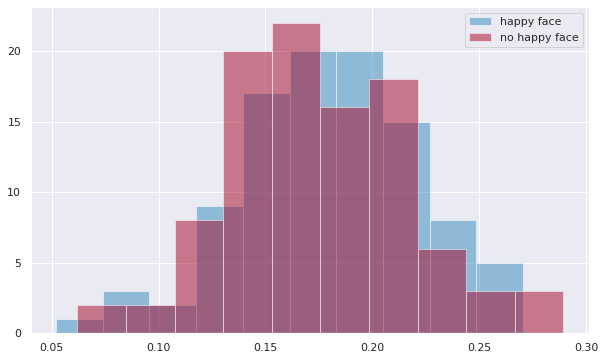

In [ ]:
nsamples = 100
f_frac = 0.45
nfemale, nmale = round(nsamples * f_frac), round(nsamples * (1 - f_frac)) 
f_nohappy = stats.norm(0.17, 0.04)
f_happy = stats.norm(0.20, 0.04)
m_nohappy = stats.norm(0.17, 0.04)
m_happy = stats.norm(0.16, 0.04)

mh, fh, mn, fn = (m_happy.rvs(size=nmale), f_happy.rvs(size=nfemale), 
                  m_nohappy.rvs(size=nmale), f_nohappy.rvs(size=nfemale))

happy = np.concatenate((fh, mh))
np.random.shuffle(happy)

nohappy = np.concatenate((fn, mn))
np.random.shuffle(nohappy)

plt.hist(happy, color="#348ABD", alpha=0.5, label='happy face')
plt.hist(nohappy, color="#A60628", alpha=0.5, label='no happy face');
plt.legend()

from scipy.stats import ttest_ind
stat,p = ttest_ind(happy, nohappy)
if p < 0.05:
    print('Found stat. sig difference between average tip between happy face/no happy face group at the 5% level')
else:
    print('Failed to reject null that there is a difference between average tip for happy face/no happy face groups at the 5%')

Now, lets repeat the experiment assuming our grad student hadn't messed up and we had the proper labels to segregate the samples appropriately.

Found stat. sig difference between average tip between happy face/no happy face group at the 5% level


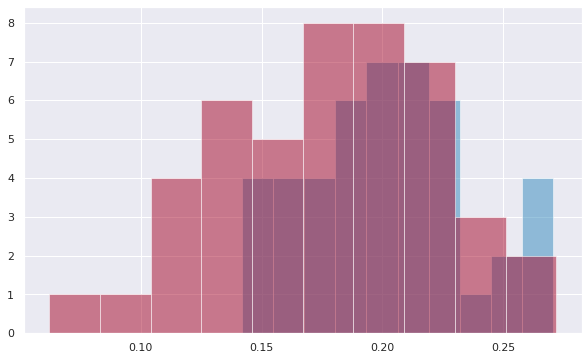

In [ ]:
plt.hist(fh, color="#348ABD", alpha=0.5, label='happy face')
plt.hist(fn, color="#A60628", alpha=0.5, label='no happy face');

from scipy.stats import ttest_ind
stat,p = ttest_ind(fh, fn)
if p < 0.05:
    print('Found stat. sig difference between average tip between happy face/no happy face group at the 5% level')
else:
    print('Failed to reject null that there is a difference between average tip for happy face/no happy face groups at the 5%')

Ah! clearly, we get different results when drawing from an independent distribution. Note, if we increased the sample size enough, we would be able to differentiate between even the mixed up distribution, since the male/female difference are not quite symmetric.

So, we've seen that if our iid assumptions don't hold, the results of our statistical models don't hold.

## Marginal, Conditional and Joint Probability

I would consider this section the most important prerequisite for the rest of the course. Without grokking these topics, you will forever be be looking through statistics through clouded glass. Thankfully, each concept is simple and straightforward!

We'll use our narrative above throughout our discussion on these topics.

### Marginal Probability

Marginal probability is simply the probability of some event occuring. I know, I know - if it's the probability of some event occuring, why call it the marginal probability?

Well, it's namesake is owed to having a table of probabilities for discrete events, and you sum by the discrete events up by rows or columns and write the result in the margins. I think this is best explained with an example (taken from Ben Lambert's A Students Guid to Bayesian Statistice).

Let's say that you are a horse racing afficionado. You are iterested in horses from a particular stable that you think produces winners. You notice that horses from this stable tend to do well or poorly at the same time due to weather conditions. You've tabulated the wins and losses of Tom and Jerry, two of the horses, noting when they both win, neither win, or only one wins.


In [ ]:
import pandas as pd
df_marg = pd.DataFrame(data=[[0.25, 0.15], [0.1, 0.5]], columns=['Win', 'Lose'], index=['Win', 'Lose'])
df_marg = pd.concat([df_marg], keys=['Tom'], axis=0)
df_marg = pd.concat([df_marg], keys=['Jerry'], axis=1)
df_marg

Jerry      
           Win  Lose
Tom Win   0.25  0.15
    Lose  0.10  0.50

We see that 80% of the time, either they both win or they both lose. If we start to ask questions about the data, such as what is the probability that Jerry wins? Well, Jerry winning is the sum of the dataframe by rows in the 'Win' column:

In [ ]:
print(f"The probability that Jerry wins is: {df_marg.sum(axis=0).loc(axis=0)['Jerry', 'Win']}")

The probability that Jerry wins is: 0.35


Note that we summed up the rows in the win columns, and if this was old school pre computer day, you can imagine we would have written that answer in the marin of the table.

What about the chances that Tom loses? We do the same thing:

In [ ]:
print(f"The probability that Tom loses is: {df_marg.sum(axis=1).loc(axis=0)['Tom', 'Lose']}")

The probability that Tom loses is: 0.6


Well, how does that apply to our example from earlier? Let's say that we want to know the probability that we'll receive a tip greater than 20%. We need to sample from both the male and female distributions, then add up the total occurence.

In [ ]:
cases = (fh, fn, mh, mn)
counts = [len(x[x > 0.2]) for x in cases]
n_above = sum(counts)
total_cases = len(np.concatenate(cases, axis=0))
print('Probability a guest left a tip in excess of 20%: ' + str(round(n_above / total_cases * 100, 1)))

Probability a guest left a tip in excess of 20%: 33.0


Before we move on, an exercise. We can calculate the above by making a table similar to the win/loss table we made above. We can consider the combination of 4 states: is male server, is female server, did tip above 20%, did not tip 20%. Try repeating the analysis by reshaping the data into a table of the possible outcomes!

In [ ]:
# your code here. Create a 2 x 2 matrix with the Male/Female as the columns, (Tipped > 20%)/(Tipped < 20%) as the rows 

## Conditional Probability

The conditional probability is the probability that event B will occur, given that we know event A occured. I like to think of conditional probability as gathering more information which helps us to further narrow down the exact situation we're dealing with. For instance, if you're tasked with predicting the temperature outside on a random day next year, you probably won't have a very good idea and would just guess the yearly average. If I then tell you what month that day is in, you still won't know what the temperature will be, but you'll be able to narrow down your guess a bit - you've conditioned your estimate on the month variable. Like all things probability related, it makes more sense in context.

From our previous example, we saw that male and females had different effects on their reeived tips after drawing a smiley face on the back of the receipt. To review, drawing a smily face increased the expected tip by 3% for female servers, but decreased it by 1% for male servers. Our statistical tests told us that without gender information, we couldn't tell the difference between the happy face drawers and the controls. However, once we separated out the gender information - when we conditioned on the female class, we saw that the average tip size seemed higher when a happy face was added to the bill. We suppose that


$$Pr(tip > tip_{\alpha} | gender = F, happy=True) > Pr(tip > tip_{\alpha} | happy=True)$$

for any arbitrary tip threshold threshold $tip_{\alpha}$. 

Breaking down the above, we're saying that the probability Pr that our observed tip is greater than some reference point $tip_{\alpha}$ given (we use a  | character for "given") that the gender is female is and the happy face condition is higher than the overall probability that our tip is greater than some threshold for all happy face conditions.

First, let's test our intuition numerically

We want to better understand the the probability of receiving a tip greater than 20% under different conditions. For instance, what is the probability a female server gets a tip greater than 20% across the entire data set? What about when we consider only the cases where they used a happy face?

Investigating how applying these different conditions affects the probability of receiving a tip greater than 20% is the essence of conditional probability. Let's do a few examples.

In [ ]:
cases = (fh, fn, mh, mn)
# count the number of tips greater than 20% received across all the cases
counts = [len(x[x > 0.2]) for x in cases]


# 1. Probability a server got a tip greater than 20%, gvien they are female
# Now, we already know that the server is female, so we only want to consider the female buckets. That is, 
# P(tip > 20 | server = F) is the same as calculating the proportion of tips greater than 20% in the female 
# server cases

pr_tip_f = (counts[0] + counts[1]) / (len(fh) + len(fn))

# 2: Probability a server got a tip greater than 20%, given they are female AND in the happy face bucket
# P(tip > 20 | server = F, happy face = True)

pr_tip_f_happy = counts[0] / len(fh) # we only consider the bucket of both happy faces and female, 
                                     # since we have conditioned on both those variables

# 3 Probability a server got a tip greater than 20%, provided they are in the happy face bucket

pr_tip_happy = (counts[0] + counts[2]) / (len(fh) + len(mh))



In [ ]:
print(f'Probability a server got a tip greater than 20%, '
      f'given they are female: {round(pr_tip_f * 100,1)}%')

print(f'Probability a server got a tip greater than 20%, '
      f'given they are female and used a happy face: {round(pr_tip_f_happy * 100,1)}%')

print(f'Probability a server got a tip greater than 20%, '
      f'given they had the happy face condition: {round(pr_tip_happy * 100,1)}%')

Probability a server got a tip greater than 20%, given they are female: 48.9%
Probability a server got a tip greater than 20%, given they are female and used a happy face: 57.8%
Probability a server got a tip greater than 20%, given they had the happy face condition: 36.0%


Hmm, seems like our intuition is on to something! Let's take a look at this visually. Note that for simplicity we're only going to consider the happy condition below.

Let's assume that guests leave tips which average around some value driven by social norms, and are normally distributed around that average value. The normal distribution is a good assumption for a distribution to use when you believe there are a large number of interacting factors which all impact a value up or down. That is, if the tip size the guest leaves is a sum of a large number of effects such as their disposition, their mood, the weather outside, the food quality, time of day, etc etc. 

We can break down our overall distribution into two constituent distributions,

$$tip_{f} \sim N(\mu_f, \sigma)$$
$$tip_{m} \sim N(\mu_m, \sigma)$$

Where $\mu_f = f(\mu; server=F)$ and $\mu_m = f(\mu; server=M)$

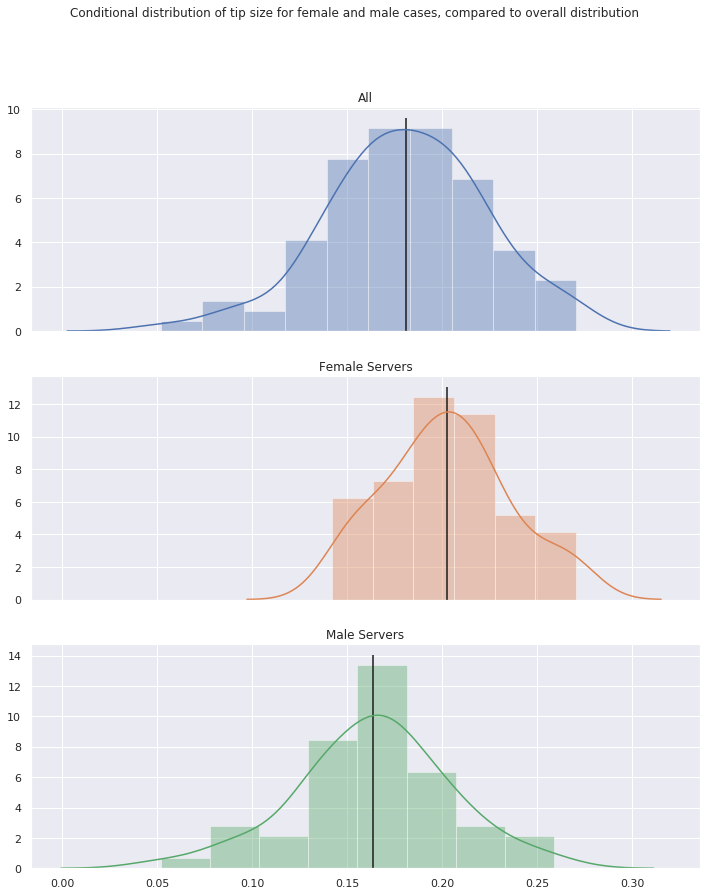

In [ ]:
import seaborn as sns
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,14), sharex=True)
sns.distplot(np.concatenate((fh, mh)), ax=ax1, label='All')
ax1.set_title('All')
ax1.vlines(np.concatenate((fh, mh)).mean(), 0, ax1.get_ylim()[1])
sns.distplot(fh, ax=ax2, color=sns.color_palette()[1], label='Female Servers')
ax2.vlines(fh.mean(), 0, ax2.get_ylim()[1])

ax2.set_title('Female Servers')
sns.distplot(mh, ax=ax3, color=sns.color_palette()[2], label='Male Servers')
ax3.set_title('Male Servers')
ax3.vlines(mh.mean(), 0, ax3.get_ylim()[1])
plt.suptitle('Conditional distribution of tip size for female and male cases, compared to overall distribution');

Now, we could repeat the exact same methodology by conditioning on the happy face/no happy face condition as well. Go ahead and try!

In [ ]:
# your code here

## Joint Probability

Joint probability is a bit simpler than conditional probability. The joint probability is simply the probability of condition A being true AND condition B being true. We write this as

$$Pr(A \cap B) = Pr(A) \text{ and } Pr(B)$$

where $\cap$ is the symbol for intersection. This is easiest seen with a venn diagram:

![venn_probab.png](https://drive.google.com/uc?id=1HrSYIjBuIhLkA1FP85SFlx6H5mWzTfeV)

In our example, it is the probability of having a male server AND being tipped greater than 18%, or the probability of being given a smiley face AND being tipped less than 15%


In [ ]:
cases = (fh, fn, mh, mn)

counts = [len(x[x > 0.18]) for x in cases]
n_above = sum(counts[2:])
total_cases = len(np.concatenate(cases, axis=0))
print('Probability a server is male AND received a tip greater than 18%: ' + str(round(n_above / total_cases * 100, 1)) +'%')

counts = [len(x[x < 0.15]) for x in cases]
n_above = counts[0] + counts[2]
print('Probability received a happy face drawn AND guest tipped less than 15%: ' + str(round(n_above / total_cases * 100, 1)) +'%')

print('Probability received a happy face drawn AND guest tipped less than 15% AND sever was female: ' + str(round(counts[0] / total_cases * 100, 1)) +'%')

Probability a server is male AND received a tip greater than 18%: 17.0%
Probability received a happy face drawn AND guest tipped less than 15%: 10.0%
Probability received a happy face drawn AND guest tipped less than 15% AND sever was female: 1.0%


### Visualizing joint probability distributions

Let's quickly take one more look at visualizing joint probability before moving on. Let's imagine we are investigating the impact on jobless claims with subsequent changes in GDP growth. Now, we'd hypothesize if there is a big uptick in initial jobless claims, we would expect GDP growth to slow in the next few quarters.

We've downloaded some data from the [Federal Reserve of St Louis](https://fred.stlouisfed.org/series/IC4WSA). We'll plot the distrution of jobless claims, the distribution of GDP growth change, and then a visualization known as a joint plot where we can see the joint probability distribution formed by the intersection of the two distributions.



In [ ]:
# load and prep the data
claims = pd.read_csv('./jobless_gdp.csv', index_col='date', parse_dates=True).groupby(pd.Grouper(freq='Q')).mean()
claims.gdp_change = (claims.gdp_change - 1) * 100
# we're interested in jobless claims predicting future change in GDP, so lets lag GDP by two quarters
claims.gdp_change = claims.gdp_change.shift(2)
claims.dropna(inplace=True)
claims.head()

,jobless_claims,gdp_change
date,,
1967-09-30,221035.714286,0.061271
1967-12-31,210615.384615,0.946133
1968-03-31,208692.307692,0.754020
1968-06-30,197153.846154,2.039493
1968-09-30,196038.461538,1.670809


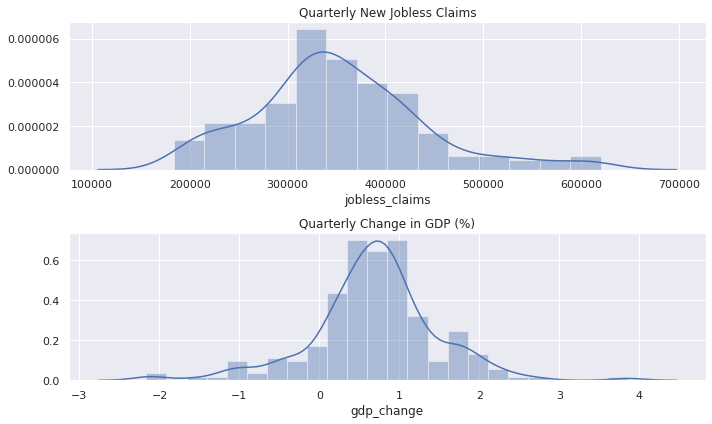

In [ ]:
f, (ax1, ax2) = plt.subplots(2,1)
sns.distplot(claims.jobless_claims, ax=ax1)
ax1.set_title('Quarterly New Jobless Claims')
sns.distplot(claims.gdp_change, ax=ax2)
ax2.set_title('Quarterly Change in GDP (%)')
plt.tight_layout()

Let's take a look at what these two distributions look like plotted together:

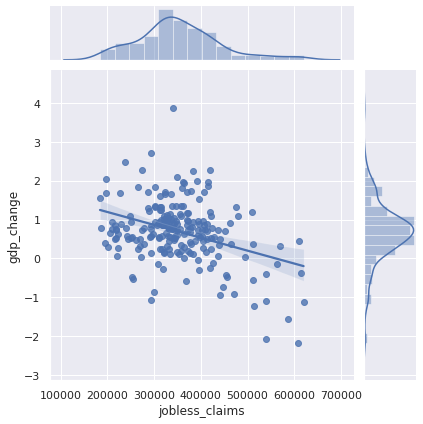

In [ ]:
sns.jointplot('jobless_claims', 'gdp_change', data=claims, kind="regplot");

This forms the joint probability distribution between jobless claims and future quarterly change in GDP in the US. We can see that a relationship exists between these two random variables - when jobless claims is high, the change in GDP is more likely to be smaller (or more largely negative).

We can think intuitively what this would mean for us. If someone told you "weekly new jobless claims averaged 600,000 this quarter, what would you expect GDP to do by looking at the chart above? You wouldn't be able to say for certain what the change in GDP would be, but you'd think it likely that GDP would decrease over the next couplt of quarters, maybe around 1% or 2%.

Therefore, the mutual information between jobless claims and GDP growth is non-zero. That is, if we know what the value of jobless claims are, we have some idea of what the range of GDP growth could be. Notice how similar the idea of mutual information is to the concepts of conditional probability that we discussed. A high mutual information between two distributions (jobless claims tells you about GDP), then we can imagine that conditioning on one of the variables (say, jobless claims > 500,000) would constrain the range of values we would expect from the new conditiona distribution.

## Tying Together Joint, Conditional, and Marginal Probability

Let's integrate what we've learned and set the stage for the Bayesian ideas we'll investigate later. There is a really intuitive understanding for how all these concepts play together, though it's one that often confuses students with arcane symbols. We'll work through it first, and then show the mathematical expression.

Let's return now to our serving story. Thus far, every time we've asked a particular question about the data, we've simply calculated the number of cases matching our particular use case. Let's slow down and think about it. 

Let's go back to the conditional probability. For simplicity, we'll only consider the cases where a happy face was drawn on the bill. We want the probability that a tip greater than 20% is received, given that the server was female.

Previously, we calculated this with the following algorithm:

```
# recall fh = female happy face tips, mh = male happy face tips
tips_greater_20_f = len(fh[fh > 0.2])
probab_gt20_given_f = tips_greater_20_f / fh
```

1. Count the number of tips greater than 20% in the female happy face server bucket
2. Divide that by the total number of tips received for both male and female servers

Let's see if we can solve the same problem without having to count the total numbers. What if we didn't have the total number of tips received, and we only had the *proportion* of tips received and the ratio of male to female servers? It seems like we should still be able to calculate $P(tip > 0.2 | server=F)$ right? It doesn't matter if we server 100 or 1000 tables.


Let's think through it then!

For step 1 above, we're thinking about the proportion of tips greater than 20% received by female servers out of all the different combinations (male AND tip > 20, female AND tip < 20, etc).

Let's call receiving a tip greater than 20% event A, and receiving a female server event B. So, a female server receiving a tip greater than 20% is A AND B, or $P(A \cap B)$

Lets quickly calculate that here. 


In [ ]:
# remember - to simplify the calculations we are only considering the happy face condition
a_and_b = len(fh[fh > 0.2]) / (len(fh) + len(mh))
print(round(a_and_b, 2))

0.26


Okay, so we know how often a female server receives a tip greater than 20%, AKA the joint probability of receiving a female server and getting a good tip.

So, from here, how do recreate step 2 from above? That is, how do we only consider the cases where servers are female, such that we can get the probability that a server gets a tip greater than 20% *provided* that they're female? 

Well, that's simple! If we know eg 25% of all servers get good tips, and female servers make up about 45% of all the servers at the restaurant, we simply have back out the proportion of female servers! That is, we just have to divide 0.25 / 0.45! That is, we divide by the probability that a server is female.

------------ Aside -------------

Since proportions aren't as easy to visualize, I'll quickly add some numbers. There are 10 servers; 5 men, 5 women. We know that 3 female servers got good tips. What is the probability of a female server getting a good tip? Easy - 3/5 = 0.6. Convertig those numbers back to proportions: (3/10)/(5/10) = 0.3/0.5 = 0.6

------------ End Aside -------------

Stated with our statistical jargon, we divide by the marginal probability of event B. 

Putting it all together, to get the conditional probability we divide the joint probability by the marginal probability. Symbollically, this means

$$P( A | B ) = \frac{ P(A \cap B)} {P(B) }$$

or 

$$P( good tip | server=F ) = \frac{ P(good tip \cap server=F)} {P(server=F) }$$

Lets confirm that this works:

In [ ]:
b = len(fh) / (len(fh) + len(mh))
a_given_b = a_and_b / b

print(f'Using theorem: {round(a_given_b, 4)}')
print(f'Using counts: {round(len(fh[fh > 0.2]) / len(fh), 4)}')

Using theorem: 0.5778
Using counts: 0.5778


Alright! So, we've proven that we can use a mathematical formula which matches with our intuition! You may be wondering why we needed to go through all that rigamarole. There are two reasons. In a many real world cases, our human brains aren't quite as well equipped to think about probabilities outside of simple cases. We'll take a bit more of a look at that in the next session with Bayes theorem. Second, it allows us to program in rules about probability to a computer! 

We can think about a narrative or a data generation story as a human, translate that story into the language of mathematics and probability, then convert from mathematical language to the programming language of your choice. We can use math as the intermediary between humans and machines.

There is one last forula I'll share with you before we move on. Reflect on the multiplicative rule above. We used $P(A|B)$ on the left, but it would be pretty easy for us to flip that around and write $P(B|A)$. Let's quickly rewrite that:

$$P( B | A ) = \frac{ P(B \cap A)} {P(A) }$$

So, the probability that the server is female, given that they got a good tip, is the proportion of servers who got a good tip AND are female, divided by the proportion of servers who got a good tip.

Well, notice that

$$P(A \cap B) == P(B \cap A)$$ 

The order of an AND operation doesn't matter - the probability that I'm a coder AND like sci fi is equal to the probability that I like sci fi and I'm a coder. 

So,

$$P( A | B )\cdot P(B) = P(A \cap B) = P( B | A )\cdot P(A)$$

Let's eliminate the redundant equality and rearrange:

$$P( A | B ) = \frac{ P(B | A) P(A) } {P(B) }$$
 
which is the familiar Bayes theorem. Congratulations - you just derived one of the most important formulas in statistics and applied mathematics!

For fun, let's quickly answer the question - if a server got a good tip, what is the probability they were female? Expressed mathematically,

$$P( server=F | good tip ) = \frac{ P(good tip | server=F) \cdot P(server=F)} {P(good tip) }$$

In [ ]:
p_goodtip_given_f = a_given_b # from above
p_goodtip = (len(fh[fh > 0.2]) + len(mh[mh > 0.2])) / (len(fh) + len(mh))
p_f = len(fh) / (len(fh) + len(mh))
p_server_f_given_good_tip = p_f * p_goodtip_given_f / p_goodtip
print('If someone got a good tip, there is a '
      f'{round(p_server_f_given_good_tip, 2) * 100}% chance they are female')

If someone got a good tip, there is a 72.0% chance they are female


## Conclusion

To review, we learned the following:

1. Random (stochastic) variables
  - Not truly random, can only create educated guesses
2. Independent and Identically Distributed
  - Events don't impact each other (independence)
  - Distrbution is constant and doesn't change over time (identically distributed)
3. PMF/PDF and CDF
  - The probability that you draw a given value from a distribution
4. Marginal, joint, and conditional probability
  - Marginal: The probability an event occurs
  - Joint: The probability two or more events occur at the same time
  - Conditional: The probability event B occurs knowing that event A also occured
5. Bayes theorem and the general multiplication rule


### Next Time: Intro to Bayesian Inference

Conecpts:
- Bayes Theorem Examples
- What is bayesian inference?
- Breaking down Bayes: Prior, Likelihood and Posterior
- Tour of probability distributions